# PyMarek - Day 2 (DSR 17)

Deep dive into NumPy

Building our onw NNet from scratch using NumPy and Tensorflow

relational & comparison operators

In [1]:
# vecotrized in the same manner as, e.g., * or +
# all of them result in boolean arrays
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
A = np.c_[1:4, 11:14]
A

array([[ 1, 11],
       [ 2, 12],
       [ 3, 13]])

In [3]:
A > 10

array([[False,  True],
       [False,  True],
       [False,  True]])

In [4]:
A == A

array([[ True,  True],
       [ True,  True],
       [ True,  True]])

In [5]:
A == np.r_[2, 13]

array([[False, False],
       [ True, False],
       [False,  True]])

In [6]:
# np.any, np.all

In [7]:
np.all(A == A)

True

In [9]:
np.all(A == np.r_[2, 13])

False

In [ ]:
# np.sum  True -> 1, False -> 0
# np.mean 

In [10]:
np.sum(A>10)

3

In [11]:
np.mean(A>10)

0.5

In [15]:
np.random.seed(123)
x = np.random.rand(10000)
np.mean(x>0.5)

0.5035

In [16]:
0.25 <= x <= 0.75 # operator chaining only for scalars in python

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [18]:
np.mean(np.logical_and(0.25 <= x, x <= 0.75))

0.4985

In [ ]:
# bitwise and == &
# bitwise  or == |
# bitwise not == (tilde)
# bitwise xor == ^

In [20]:
# https://docs.python.org/3/reference/expressions.html --> sec. 6.16
(0.25 <= x) & (x <= 0.75)

array([ True,  True, False, ..., False, False,  True])

# Vectorized math ops

x - array

y == f(x) -- apply f on every element in x 


y.shape == x.shape


`np.sin cos tan...`

`np.exp, np.log, np.log10, floor, ceil, round, trunc, sqrt, ....`

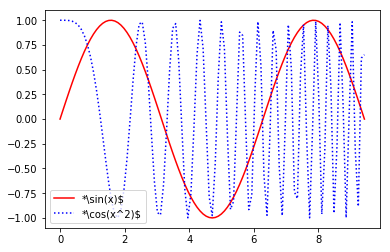

In [21]:
x = np.linspace(0, 3*np.pi, 101)
plt.plot(x, np.sin(x), 'r-', label=r'*\sin(x)$') # label is keyword argument, check 'not so short intro to LaTex'
plt.plot(x, np.cos(x**2), 'b:', label=r'*\cos(x^2)$')
plt.legend()
plt.show()

# vector indexing

In [23]:
x = [1, 2, 3, 5, 4] # python list
x

[1, 2, 3, 5, 4]

In [24]:
x[0:2] # slices, always returns a list (subsetting)

[1, 2]

In [27]:
x[0] # scalar-based extracting (extraction)

1

In [28]:
x[-1]

4

In [29]:
x = np.array(x)
x

array([1, 2, 3, 5, 4])

In [31]:
# 1. scalar-based indexing
x[0]

1

In [32]:
x[-1]

4

In [33]:
# 2. slice-based:
x[::2]

array([1, 3, 4])

In [34]:
# 3. vector-based indexing:
x[ np.r_[0, -1, 0, 2] ]

array([1, 4, 1, 3])

In [35]:
# 4. bool-vector-based indexing:
print(x)
x[ np.r_[True, False, True, False, False] ]

[1 2 3 5 4]


array([1, 3])

In [36]:
x[x<3]

array([1, 2])

In [37]:
x<3

array([ True,  True, False, False, False])

In [38]:
x[(x>1)&(x<5)]

array([2, 3, 4])

In [39]:
np.random.seed(6)
x = np.round(np.random.normal(size=20), 2)
x

array([-0.31,  0.73,  0.22, -0.9 , -2.49,  0.91,  1.13, -1.51,  1.64,
       -0.43,  2.63,  0.6 , -0.34,  1.24,  0.11,  0.13,  0.08, -0.16,
        0.63,  0.81])

* Print all values in $[-2,-1]\cup[1,2]$.
* Print the number and the proportion of nonnegative elements in `x`.
* Compute the arithmetic mean of absolute values.
* Determine elements in `x` which are the least and the most distant from 0.
* Determine 3 elements in `x` which are the most distant from the arithmetic mean of `x`.
* Create a vector `x2`, which is a version of `x` with all outliers removed,
i.e., all observations $x_i$ such that $x_i\not\in[Q_1-1.5IQR, Q_3+1.5IQR]$,
where $IQR=Q_3-Q_1$ denotes the interquartile range and $Q_1$ and $Q_3$
denote the 1st and 3rd sample quartiles, respectively.
* Create a vector `y` such that `y[i]` is equal to `"nonnegative"`
if the corresponding `x[i]&gt;=0` and `"negative"` otherwise.
* Create a vector `y` such that `y[i]` is equal to `"small"` if
the corresponding `x[i]&lt;-1`, `"large"` if `x[i]&gt;1` and `"medium"` otherwise.

* Print all values in $[-2,-1]\cup[1,2]$.

In [40]:
x[(abs(x) <= 2) & (abs(x) >= 1)]

array([ 1.13, -1.51,  1.64,  1.24])

* Print the number and the proportion of nonnegative elements in `x`.

In [44]:
np.sum(x>=0), np.mean(x>=0)

13

* Compute the arithmetic mean of absolute values.

In [119]:
np.mean(np.abs(x))

0.85

* Determine elements in `x` which are the least and the most distant from 0.

In [120]:
x[np.argmin(np.abs(x-0))], x[np.argmax(np.abs(x-0))]

(0.08, 2.63)

In [122]:
# other example
y = np.r_[1, -0.1, -1, -7]
distance_to_zero = np.abs(y-0)
distance_to_zero

array([1. , 0.1, 1. , 7. ])

In [124]:
np.argmin(distance_to_zero)

1

In [125]:
# choose the element minimizing distance_to_zero
y[np.argmin(distance_to_zero)]

-0.1

In [134]:
# other solution
np.percentile(abs(x), [0, 100])

array([0.08, 2.63])

* Determine 3 elements in `x` which are the most distant from the arithmetic mean of `x`.

In [127]:
d = np.abs(x-np.mean(x)) # distance from the mean
np.argsort(d)

array([ 2, 15, 14, 16, 11, 18, 17,  1,  0, 19, 12,  9,  5,  6, 13,  3,  8,
        7, 10,  4])

In [129]:
np.argsort(d)[-3:]

array([ 7, 10,  4])

In [130]:
x[np.argsort(d)[-3:]]

array([-1.51,  2.63, -2.49])

* Create a vector `x2`, which is a version of `x` with all outliers removed,
i.e., all observations $x_i$ such that $x_i\not\in[Q_1-1.5IQR, Q_3+1.5IQR]$,
where $IQR=Q_3-Q_1$ denotes the interquartile range and $Q_1$ and $Q_3$
denote the 1st and 3rd sample quartiles, respectively.

In [131]:
q1, q3 = np.percentile(x, [25, 75])
iqr = q3 - q1
x2 = x[ (x<(q1-1.5*iqr)) | (x>(q3+1.5*iqr)) ]
x2

array([-2.49,  2.63])

* Create a vector `y` such that `y[i]` is equal to `"nonnegative"`
if the corresponding `x[i]&gt;=0` and `"negative"` otherwise.

In [132]:
np.where(x>=0, 'nonnegative', 'negative') # if-else

array(['negative', 'nonnegative', 'nonnegative', 'negative', 'negative',
       'nonnegative', 'nonnegative', 'negative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative', 'negative',
       'nonnegative', 'nonnegative', 'nonnegative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative'], dtype='<U11')

* Create a vector `y` such that `y[i]` is equal to `"small"` if
the corresponding `x[i]&lt;-1`, `"large"` if `x[i]&gt;1` and `"medium"` otherwise.

In [133]:
np.where(x>=1, 'large', np.where(x<=-1, 'small', 'medium'))

array(['medium', 'medium', 'medium', 'medium', 'small', 'medium', 'large',
       'small', 'large', 'medium', 'large', 'medium', 'medium', 'large',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium'],
      dtype='<U6')

In [135]:
# other solution
y = np.full(x.shape, 'nonnegative')
y[x<0] = 'negative'
y

array(['negative', 'nonnegative', 'nonnegative', 'negative', 'negative',
       'nonnegative', 'nonnegative', 'negative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative', 'negative',
       'nonnegative', 'nonnegative', 'nonnegative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative'], dtype='<U11')

In [138]:
# other solution
np.array(['negative','nonnegative'])[(x>=0).astype(np.int)]

array(['negative', 'nonnegative', 'nonnegative', 'negative', 'negative',
       'nonnegative', 'nonnegative', 'negative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative', 'negative',
       'nonnegative', 'nonnegative', 'nonnegative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative'], dtype='<U11')

Extra exercise:  
Write a function to compute the $k$-moving average
of a given vector x of length $n$, where $k=2l+1$ for some $l$.
Return a vector t of length $n$ with the $l$ first and $l$ last observations
set to NaN. Each other $t_i$ should be equal to the arithmetic mean
of $x_{i-l},\dots,x_i,\dots,x_{i+l}$.

np.random.seed(123)
x = np.cumsum(np.random.randn(1000))
plt.plot(x)
#plt.plot(moving_average(x, 3))
#plt.plot(moving_average(x, 9))
plt.show()

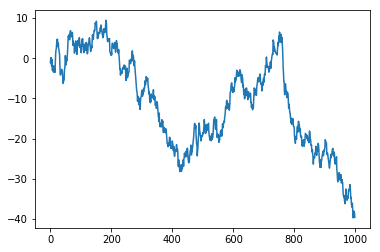

In [150]:
np.random.seed(123) 
x = np.cumsum(np.random.randn(1000)) 
plt.plot(x)

#plt.plot(moving_average(x, 3))

#plt.plot(moving_average(x, 9)) plt.show()

In [ ]:
def moving_average(x, l):
    k = 2*l+1
    y = np.convolve(x, np.ones(k)/k, mode='same')
    y[:l] = np.nan
    y[-l:] = np.nan
    return y

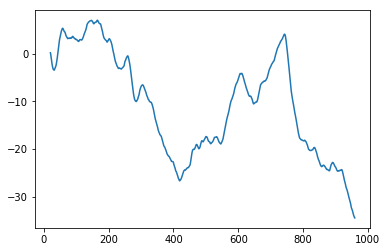

In [152]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    ret = ret[n - 1:] / n
    ret[:n] = np.nan
    ret[-n:] = np.nan
    return ret

y = moving_average(x, n=20)
plt.plot(y)

In [153]:
x = np.r_[1, 3, 5, 2, -1, -2, -3]
l = 1
k = 2*l + 1

np.cumsum(x)


array([ 1,  4,  9, 11, 10,  8,  5])

In [155]:
(np.cumsum(x)[k:] - np.cumsum(x)[:-k])/k

array([ 3.33333333,  2.        , -0.33333333, -2.        ])

Write a function that determines the mode, i.e., the most frequently occurring
value in a given vector of "small" non-negative integers (say, < 10,000). If the mode is not-unique, return a randomly chosen one.
Hint: Find a built-in function that counts the number of occurrences of each
unique value in t.

In [163]:
np.random.seed(123)
#x = np.random.randint(0, 10, 10_000)
x = np.r_[1, 1, 2, 3, 2]

In [164]:
np.unique(x)

array([1, 2, 3])

In [165]:
vals, cnts = np.unique(x, return_counts=True)
vals, cnts

(array([1, 2, 3]), array([2, 2, 1]))

In [185]:
np.argmax(cnts), vals[np.argmax(cnts)] # the smallest mode (if not unique)

(0, 1)

In [186]:
# choose random of the modes
vals[cnts == cnts.max()]

array([1, 2])

In [188]:
# choose random of the nodes
np.random.choice(vals[cnts == cnts.max()], 1)

array([1])

In [189]:
np.bincount(x)

array([0, 2, 2, 1])

In [190]:
np.argmax(np.bincount(x))

1

In [191]:
bc = np.bincount(x)
np.where(bc == np.max(bc))

(array([1, 2]),)

# Matrix indexing

A - matrix

`A[r,c] === A[ (r,c) ]`

r \ c    |scalar      |slice      |int-vec     |bool-vec    |
---------|------------|-----------|------------|------------|
scalar   |   scalar   | vector(V) |  vector    | vector     |
slice    |   x        | matrix(V) |  matrix    | matrix     |
int-vec  |   x        |    x      | vectorized | vectorized |
bool-vec |   x        |    x      |    x       |            |


(V) -- a view on an existing array

In [192]:
A = np.r_[1:13].reshape(3,4)
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [201]:
# 1st row, last col
A[0,-1]

4

In [196]:
# scalar, slice
A[0, ::2] 
A[::-1, -1]

array([12,  8,  4])

In [197]:
# slice, slice
A[::2, ::-1] # every second row, cols reversed

array([[ 4,  3,  2,  1],
       [12, 11, 10,  9]])

In [200]:
A[::2, ::-1].strides

(64, -8)

In [203]:
A.strides

(32, 8)

In [205]:
# scalar, int-vec
A[-1, np.r_[0, -1, 0, 2]]

array([ 9, 12,  9, 11])

In [207]:
# scalar, bool-vec
A[ np.r_[True, False, True], 0]

array([1, 9])

In [209]:
# slice, int-vec
A[ ::2, np.r_[0, -1, 0, 2] ]

array([[ 1,  4,  1,  3],
       [ 9, 12,  9, 11]])

In [210]:
# int-vec, int-vec
A[ np.r_[0, 1], np.r_[-1, 0] ]

array([4, 5])